In [1]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you are learning about langgraph?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right", name="Rahul"))
messages.append(AIMessage(content=f"Great, What would you like to learn about it.", name="Model"))
messages.append(HumanMessage(content=f"I would love to learn how its basic working works.", name="Rahul"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you are learning about langgraph?
================================ Human Message =================================
Name: Rahul

Yes, that's right
================================== Ai Message ==================================
Name: Model

Great, What would you like to learn about it.
================================ Human Message =================================
Name: Rahul

I would love to learn how its basic working works.


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [3]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-2.5-32b")
result=llm.invoke(messages)
result

AIMessage(content='It seems there might be a bit of confusion as "langgraph" isn\'t a widely recognized term in the fields of computer science, linguistics, or technology. Could you provide more context or clarify what you mean by "langgraph"? It could be a specific tool, a research concept, or a term used in a particular community. If it\'s related to language processing, graphs, or another specific area, giving more details would help in providing a more accurate and helpful explanation.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 98, 'prompt_tokens': 86, 'total_tokens': 184, 'completion_time': 0.24680239, 'prompt_time': 0.006499669, 'queue_time': 0.021714509, 'total_time': 0.253302059}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_7b9ecfcd5f', 'finish_reason': 'stop', 'logprobs': None}, id='run-e221da09-d29a-435f-967e-3cdfc9db175d-0', usage_metadata={'input_tokens': 86, 'output_tokens': 98, 'total_tokens': 184})

In [4]:
def add(a:int,b:int)->int:
    """
    add a to b
    """
    return a+b

In [5]:
llm_with_tools=llm.bind_tools([add])

In [6]:
tool_call=llm_with_tools.invoke([HumanMessage(content=f"What is 2 plus 3", name="Rahul")])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zy7t', 'function': {'arguments': '{"a": 2, "b": 3}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 178, 'total_tokens': 203, 'completion_time': 0.062943119, 'prompt_time': 0.011307436, 'queue_time': 0.019456980999999998, 'total_time': 0.074250555}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_7b9ecfcd5f', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-45e56628-7a8a-4c49-af02-14cde54a4491-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 3}, 'id': 'call_zy7t', 'type': 'tool_call'}], usage_metadata={'input_tokens': 178, 'output_tokens': 25, 'total_tokens': 203})

In [7]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 3},
  'id': 'call_zy7t',
  'type': 'tool_call'}]

In [8]:
from typing import Annotated
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

class MesssageState(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]

In [9]:
initial_message=[
    AIMessage(content="Hello! How can I assist you?", name="Model"),
    HumanMessage(content="I'm looking for information about India's got latent", name="Rahul")
]
## New message to add
new_messaage= AIMessage(content="Sure, I can help you with that. What specifically are you interested in?", name="Model")

add_messages(initial_message, new_messaage)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='f9dbbaf1-6111-4c71-81c0-f7d128c1b48f'),
 HumanMessage(content="I'm looking for information about India's got latent", additional_kwargs={}, response_metadata={}, name='Rahul', id='fb2f36c5-4360-4f32-acc6-ad763d7e30fc'),
 AIMessage(content='Sure, I can help you with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='e4be56aa-0e34-4cdd-ada0-9aac6c098eb3')]

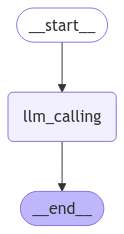

In [10]:
from IPython.display import display, Image
from langgraph.graph import StateGraph,START,END

def tool_llm_calling(state:MesssageState):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}

## BUild graph
builder=StateGraph(MesssageState)
builder.add_node("llm_calling",tool_llm_calling)
builder.add_edge(START,"llm_calling")
builder.add_edge("llm_calling",END)
graph=builder.compile()

## Display
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
messages=graph.invoke({"messages":HumanMessage(content="Hello,my name is Rahul")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello,my name is Rahul
================================== Ai Message ==================================

Hello Rahul! It's nice to meet you. How can I assist you today?


In [12]:
messages=graph.invoke({"messages":HumanMessage(content="What is 2 plus 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 2 plus 3
================================== Ai Message ==================================
Tool Calls:
  add (call_9nrb)
 Call ID: call_9nrb
  Args:
    a: 2
    b: 3


In [13]:
def multiply(a:int,b:int)->int:
    """
    Multiply a to b
    """
    return a*b

In [14]:
llm_with_tools=llm.bind_tools([multiply,add])

In [15]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState

def tool_llm_calling(state:MesssageState):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}

In [16]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

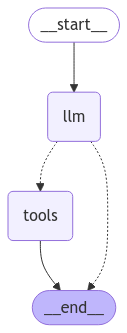

In [17]:
## Graph
builder1=StateGraph(MessagesState)
builder1.add_node("llm",tool_llm_calling)
builder1.add_node("tools",ToolNode([multiply,add]))
builder1.add_edge(START,"llm")
builder1.add_conditional_edges(
    "llm",
    ## If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    ## IF the latest message (result) from assistant is not a tool call -> tools_condition routes to END
    tools_condition,
)
builder1.add_edge("tools",END)
tool_graph=builder1.compile()

## display
display(Image(tool_graph.get_graph().draw_mermaid_png()))

In [18]:
messages=tool_graph.invoke({"messages":HumanMessage(content="what is 2*3 and then add 4 to 5?")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is 2*3 and then add 4 to 5?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_mzb8)
 Call ID: call_mzb8
  Args:
    a: 2
    b: 3
  add (call_cn51)
 Call ID: call_cn51
  Args:
    a: 4
    b: 5
================================= Tool Message =================================
Name: multiply

6
================================= Tool Message =================================
Name: add

9


In [19]:
messages=tool_graph.invoke({"messages":HumanMessage(content="Who is Samay raina?")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Who is Samay raina?
================================== Ai Message ==================================

Samay Raina is an Indian-American actor, filmmaker, and comedian. He is known for his web series "Samay Over It," which features sketches and commentary on current events and social issues. If you need more specific information about Samay Raina, please let me know!


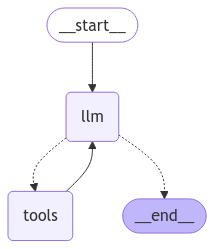

In [21]:
## Graph
builder2=StateGraph(MessagesState)
builder2.add_node("llm",tool_llm_calling)
builder2.add_node("tools",ToolNode([multiply,add]))
builder2.add_edge(START,"llm")
builder2.add_conditional_edges(
    "llm",
    ## If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    ## IF the latest message (result) from assistant is not a tool call -> tools_condition routes to END
    tools_condition,
)
builder2.add_edge("tools","llm")
tool_graph1=builder2.compile()

## display
display(Image(tool_graph1.get_graph().draw_mermaid_png()))

In [23]:
messages=tool_graph1.invoke({"messages":HumanMessage(content="what is 2*3 and then add 4 and then multiply by 10?")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is 2*3 and then add 4 and then multiply by 10?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_1hhn)
 Call ID: call_1hhn
  Args:
    a: 2
    b: 3
  add (call_zmd3)
 Call ID: call_zmd3
  Args:
    a: 6
    b: 4
  multiply (call_y6ge)
 Call ID: call_y6ge
  Args:
    a: 10
    b: 10
================================= Tool Message =================================
Name: multiply

6
================================= Tool Message =================================
Name: add

10
================================= Tool Message =================================
Name: multiply

100
================================== Ai Message ==================================

The result of 2*3 is 6. Then, adding 4 to 6 gives us 10. Finally, multiplying 10 by 10 results in 100. So, the final answer is 100.
